In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Exploración de datos

In [4]:
image_path = '/content/drive/MyDrive/Msc DS/03 SL/proyectofinal/'

In [14]:
img_keras = load_img(image_path + "Img/img002-006.png")

/content/drive/MyDrive/Msc DS/03 SL/proyectofinal/Img/img002-006.png


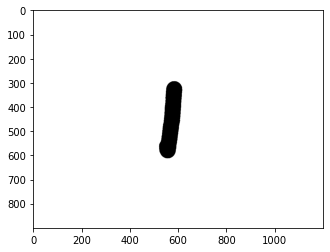

In [49]:
img_str = image_path + "img002-006.png"
print(img_str)
img = cv2.imread(img_str)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [43]:
dim = (128, 96)
resized = cv2.resize(gray, dim)

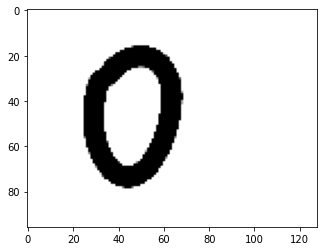

In [39]:
plt.imshow(resized, cmap="gray")

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Msc DS/03 SL/proyectofinal/english.csv')
print(df.head())
df.shape

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


(3410, 2)

In [21]:
x_dir = df['image']
y =  df['label']
X_train, X_test, y_train, y_test = train_test_split(x_dir, y, test_size=0.33)

In [68]:
x_dir.shape
print(X_train.shape)

(2284,)


In [24]:
len(y_test.unique())

62

In [ ]:
x = []
for image_ in x_dir:
  img_keras = load_img(image_path + image_)
  x.append(img_to_array(img_keras))

x.shape

# Red Neuronal Convolucional - CNN

In [51]:
callback_a = ModelCheckpoint(filepath='best_model_2.h5', monitor='accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')

In [63]:
model = keras.Sequential([
        layers.BatchNormalization(),
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(64,64,3)),
        layers.MaxPool2D(pool_size=(2, 2))
        
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),

        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(512, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(62, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, None, None, 3)     12        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
flatten_14 (Flatten)         (None, None)              0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 7200)            

In [64]:
history2 = model.fit(training_data_frame,epochs = 50, verbose=1, callbacks=[callback_a, earlystop])

Epoch 1/50
107/107 [==============================] - 75s 695ms/step - loss: 4.6960 - accuracy: 0.0299
Epoch 2/50
107/107 [==============================] - 75s 700ms/step - loss: 4.2623 - accuracy: 0.0431
Epoch 3/50
107/107 [==============================] - 75s 696ms/step - loss: 3.9538 - accuracy: 0.0683
Epoch 4/50
107/107 [==============================] - 73s 685ms/step - loss: 3.7370 - accuracy: 0.0921
Epoch 5/50
107/107 [==============================] - 73s 679ms/step - loss: 3.5441 - accuracy: 0.1238
Epoch 6/50
107/107 [==============================] - 73s 682ms/step - loss: 3.3479 - accuracy: 0.1569
Epoch 7/50
107/107 [==============================] - 73s 684ms/step - loss: 3.1058 - accuracy: 0.2026
Epoch 8/50
107/107 [==============================] - 74s 690ms/step - loss: 2.9299 - accuracy: 0.2255
Epoch 9/50
107/107 [==============================] - 73s 683ms/step - loss: 2.7421 - accuracy: 0.2716
Epoch 10/50
107/107 [==============================] - 74s 691ms/step - l

In [11]:
history = model.fit(training_data_frame, epochs = 50, verbose=1, callbacks=[callback_a, earlystop])

Epoch 1/50
107/107 [==============================] - 99s 919ms/step - loss: 3.1022 - accuracy: 0.1859
Epoch 2/50
107/107 [==============================] - 102s 948ms/step - loss: 2.9853 - accuracy: 0.2185
Epoch 3/50
107/107 [==============================] - 103s 953ms/step - loss: 2.8096 - accuracy: 0.2496
Epoch 4/50
107/107 [==============================] - 103s 962ms/step - loss: 2.6751 - accuracy: 0.2842
Epoch 5/50
107/107 [==============================] - 100s 933ms/step - loss: 2.5866 - accuracy: 0.3003
Epoch 6/50
107/107 [==============================] - 104s 968ms/step - loss: 2.4504 - accuracy: 0.3276
Epoch 7/50
107/107 [==============================] - 102s 945ms/step - loss: 2.3714 - accuracy: 0.3493
Epoch 8/50
107/107 [==============================] - 102s 950ms/step - loss: 2.2674 - accuracy: 0.3780
Epoch 9/50
107/107 [==============================] - 102s 947ms/step - loss: 2.2119 - accuracy: 0.3827
Epoch 10/50
107/107 [==============================] - 101s 936ms

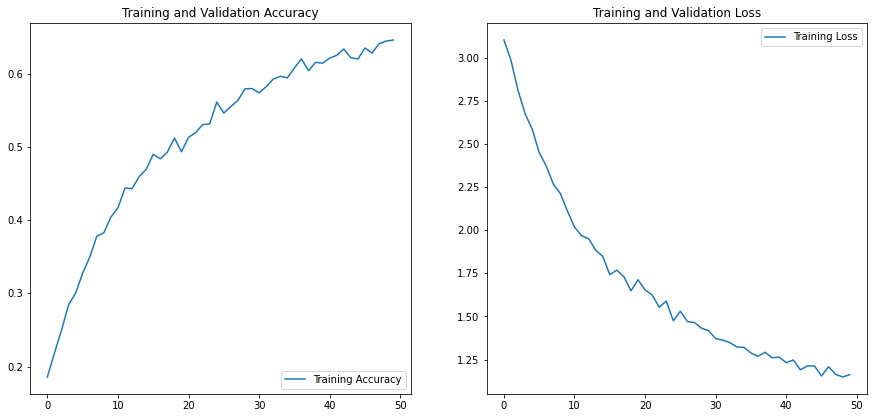

In [13]:
accuracy = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
model_predicts = model.predict(test_data_frame)

In [46]:
model_predicts

array([[2.3445387e-05, 3.3085610e-06, 4.6575966e-05, ..., 2.7381406e-05,
        2.4086539e-05, 2.2222598e-03],
       [3.3407812e-08, 9.6684882e-09, 9.0196972e-06, ..., 3.0885658e-06,
        5.8562680e-08, 1.0637783e-04],
       [1.0114017e-07, 8.6389934e-07, 7.7810765e-11, ..., 2.2568715e-04,
        2.8572674e-03, 1.2240206e-10],
       ...,
       [4.8277861e-06, 7.9371830e-06, 1.1762031e-02, ..., 2.4026969e-01,
        7.0702173e-02, 6.0248200e-02],
       [1.7373938e-04, 1.4419525e-06, 1.0691897e-06, ..., 1.0111879e-05,
        5.3279840e-05, 5.0799801e-05],
       [2.2828411e-07, 4.6805750e-11, 1.2190185e-11, ..., 9.2212134e-04,
        7.6106653e-06, 2.0701258e-12]], dtype=float32)

Max index:  [46, 59, 55, 57, 59, 18, 28, 25, 27, 20, 26, 59, 50, 5, 2, 51, 56, 24, 17, 6, 39, 24, 56, 8, 17, 7, 56, 30, 3, 16, 15, 43, 42, 40, 37, 3, 32, 8, 52, 55, 35, 11, 35, 54, 59, 10, 3, 14, 20, 19, 37, 59, 4, 3, 34, 4, 13, 6, 46, 14, 11, 10, 6, 40, 28, 24, 41, 44, 51, 50, 46, 46, 2, 11, 39, 25, 42, 10, 56, 58, 30, 14, 46, 34, 52, 35, 54, 1, 32, 47, 17, 54, 15, 55, 34, 5, 24, 59, 25, 16, 59, 55, 4, 13, 45, 13, 9, 0, 12, 5, 26, 3, 21, 55, 46, 5, 49, 59, 60, 33, 4, 7, 21, 5, 23, 59, 7, 9, 59, 2, 45, 13, 49, 58, 44, 32, 10, 24, 5, 43, 58, 4, 55, 61, 60, 57, 2, 46, 36, 35, 11, 26, 18, 2, 4, 35, 12, 31, 32, 19, 38, 34, 34, 7, 4, 44, 13, 6, 38, 52, 0, 51, 59, 14, 48, 11, 45, 9, 53, 28, 10, 18, 34, 6, 15, 9, 59, 6, 44, 51, 50, 56, 39, 3, 59, 57, 39, 8, 36, 28, 44, 54, 31, 35, 26, 31, 15, 55, 59, 60, 46, 19, 16, 44, 3, 52, 3, 48, 23, 53, 23, 11, 59, 19, 48, 36, 25, 6, 35, 60, 29, 35, 3, 34, 44, 58, 38, 20, 43, 38, 11, 46, 2, 27, 29, 8, 5, 35, 39, 39, 30, 14, 56, 14, 1, 49, 7, 48, 19, 57, 

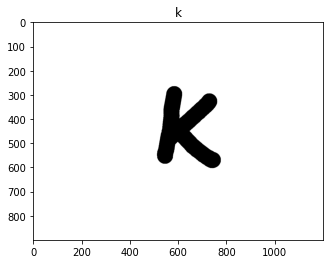

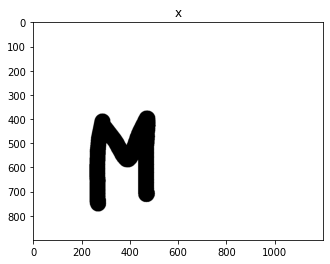

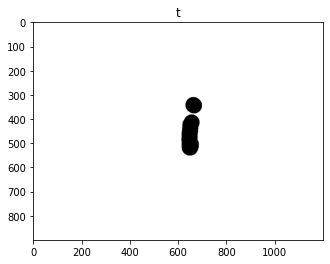

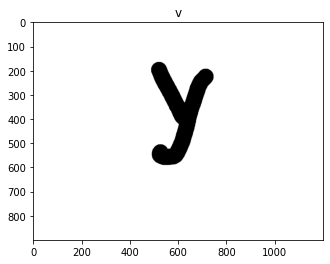

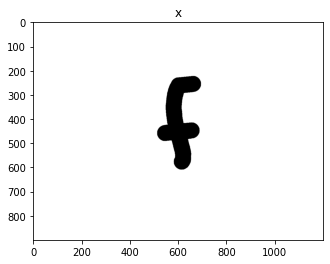

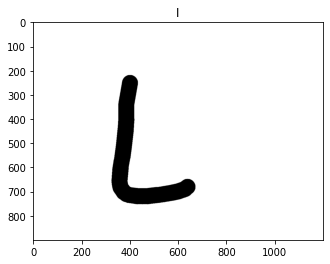

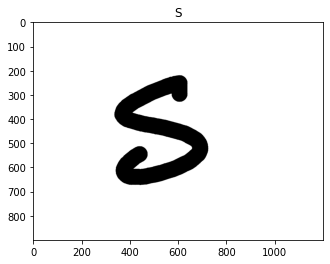

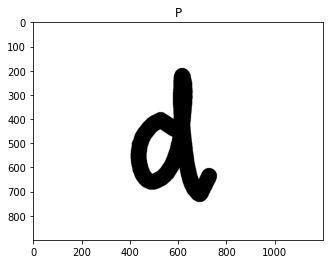

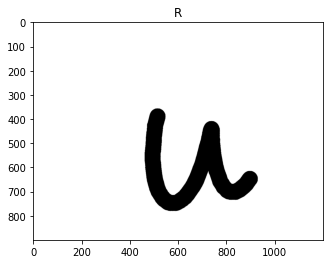

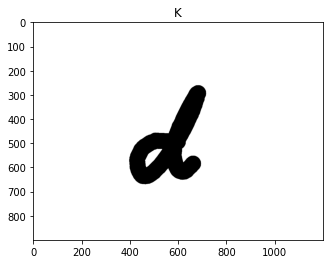

In [49]:
pred = model.predict(test_data_frame)
classDict = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}


outputDf = pd.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(10):
    image = cv2.imread(image_path + '/' + test_set.at[i, 'image'])
    plt.title(classDict.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

## Data Augmentation

In [57]:
train_data_generator = ImageDataGenerator(
            rescale=1/255,
            shear_range=0.2,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,)

training_data_frame = train_data_generator.flow_from_dataframe( 
                                            dataframe = df, 
                                            directory = image_path,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')

Found 3410 validated image filenames belonging to 62 classes.


In [42]:
rand = random.sample(range(len(df)), 300)
test_set = pd.DataFrame(df.iloc[rand,:].values, columns = ['image','label'])

In [44]:
data_generator = ImageDataGenerator(rescale = 1/255)

test_data_frame = data_generator.flow_from_dataframe( 
                                            dataframe = test_set, 
                                            directory = image_path,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')

Found 300 validated image filenames belonging to 62 classes.
